In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Cleaning:** 
Each row of data represents the sensor readings taken at a certain point in time of a certain engine.

In [2]:
training_data_1 = pd.read_csv("CMAPSSData/train_FD001.txt", header=None, sep=" ")
training_data_2 = pd.read_csv("CMAPSSData/train_FD002.txt", header=None, sep=" ")
training_data_3 = pd.read_csv("CMAPSSData/train_FD003.txt", header=None, sep=" ")
training_data_4 = pd.read_csv("CMAPSSData/train_FD004.txt", header=None, sep=" ")

In [3]:
index = ['Engine', 'Cycle']
settings = ['Setting 1', 'Setting 2', 'Setting 3']
sensors = [ 'Fan Inlet Temperature (◦R)',
           'LPC Outlet Temperature (◦R)',
           'HPC Outlet Temperature (◦R)',
           'LPT Outlet Temperature (◦R)',
           'Fan Inlet Pressure (psia)',
           'Bypass-Duct Pressure (psia)',
           'HPC Outlet Pressure (psia)',
           'Physical Fan Speed (rpm)',
           'Physical Core Speed (rpm)',
           'Engine Pressure Ratio (P50/P2)',
           'HPC Outlet Static Pressure (psia)',
           'Ratio of Fuel Flow to Ps30 (pps/psia)',
           'Corrected Fan Speed (rpm)',
           'Corrected Core Speed (rpm)', 
           'Bypass Ratio',
           'Burner Fuel-Air Ratio',
           'Bleed Enthalpy',
           'Required Fan Speed',
           'Required Fan Conversion Speed',
           'High-Pressure Turbines Cool Air Flow', 
           'Low-Pressure Turbines Cool Air Flow',
           'Sensor 26',
           'Sensor 27'          
          ]
col_names = index + settings + sensors

In [6]:
training_data_1.columns = col_names
training_data_2.columns = col_names
training_data_3.columns = col_names
training_data_4.columns = col_names
training_data_1.describe()

,Engine,Cycle,Setting 1,Setting 2,Setting 3,Fan Inlet Temperature (◦R),LPC Outlet Temperature (◦R),HPC Outlet Temperature (◦R),LPT Outlet Temperature (◦R),Fan Inlet Pressure (psia),...,Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow,Sensor 26,Sensor 27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [7]:
training_data_2.describe()

,Engine,Cycle,Setting 1,Setting 2,Setting 3,Fan Inlet Temperature (◦R),LPC Outlet Temperature (◦R),HPC Outlet Temperature (◦R),LPT Outlet Temperature (◦R),Fan Inlet Pressure (psia),...,Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow,Sensor 26,Sensor 27
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,0.0,0.0
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423,NaN,NaN
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500,NaN,NaN
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300,NaN,NaN
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200,NaN,NaN
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200,NaN,NaN
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100,NaN,NaN


In [8]:
training_data_3.describe()

,Engine,Cycle,Setting 1,Setting 2,Setting 3,Fan Inlet Temperature (◦R),LPC Outlet Temperature (◦R),HPC Outlet Temperature (◦R),LPT Outlet Temperature (◦R),Fan Inlet Pressure (psia),...,Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow,Sensor 26,Sensor 27
count,24720.000000,24720.000000,24720.000000,24720.000000,24720.0,2.472000e+04,24720.000000,24720.000000,24720.000000,2.472000e+04,...,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000,0.0,0.0
mean,48.631877,139.077063,-0.000024,0.000005,100.0,5.186700e+02,642.457858,1588.079175,1404.471212,1.462000e+01,...,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024,NaN,NaN
std,29.348985,98.846675,0.002194,0.000294,0.0,6.684921e-11,0.523031,6.810418,9.773178,3.602525e-12,...,16.504118,0.060512,1.750371e-14,1.761459,0.0,0.0,0.248865,0.149234,NaN,NaN
min,1.000000,1.000000,-0.008600,-0.000600,100.0,5.186700e+02,640.840000,1564.300000,1377.060000,1.462000e+01,...,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600,NaN,NaN
25%,23.000000,62.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.080000,1583.280000,1397.187500,1.462000e+01,...,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200,NaN,NaN
50%,47.000000,124.000000,-0.000000,-0.000000,100.0,5.186700e+02,642.400000,1587.520000,1402.910000,1.462000e+01,...,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600,NaN,NaN
75%,74.000000,191.000000,0.001500,0.000300,100.0,5.186700e+02,642.790000,1592.412500,1410.600000,1.462000e+01,...,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300,NaN,NaN
max,100.000000,525.000000,0.008600,0.000700,100.0,5.186700e+02,645.110000,1615.390000,1441.160000,1.462000e+01,...,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500,NaN,NaN


In [9]:
training_data_4.describe()

,Engine,Cycle,Setting 1,Setting 2,Setting 3,Fan Inlet Temperature (◦R),LPC Outlet Temperature (◦R),HPC Outlet Temperature (◦R),LPT Outlet Temperature (◦R),Fan Inlet Pressure (psia),...,Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow,Sensor 26,Sensor 27
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,...,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,0.0,0.0
mean,124.325181,134.311417,23.999823,0.571347,94.031576,472.882435,579.420056,1417.896600,1201.915359,8.031626,...,8067.811812,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995,NaN,NaN
std,71.995350,89.783389,14.780722,0.310703,14.251954,26.436832,37.342647,106.167598,119.327591,3.622872,...,85.670543,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.480000,1242.670000,1024.420000,3.910000,...,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300,NaN,NaN
25%,60.000000,62.000000,10.004600,0.250700,100.000000,445.000000,549.330000,1350.550000,1119.490000,3.910000,...,8062.630000,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100,NaN,NaN
50%,126.000000,123.000000,25.001400,0.700000,100.000000,462.540000,555.740000,1367.680000,1136.920000,7.050000,...,8083.810000,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100,NaN,NaN
75%,185.000000,191.000000,41.998100,0.840000,100.000000,491.190000,607.070000,1497.420000,1302.620000,10.520000,...,8128.350000,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500,NaN,NaN
max,249.000000,543.000000,42.008000,0.842000,100.000000,518.670000,644.420000,1613.000000,1440.770000,14.620000,...,8261.650000,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200,NaN,NaN


In [10]:
training_data_1.drop(labels = ['Sensor 26', 'Sensor 27'], axis=1, inplace=True)
training_data_2.drop(labels = ['Sensor 26', 'Sensor 27'], axis=1, inplace=True)
training_data_3.drop(labels = ['Sensor 26', 'Sensor 27'], axis=1, inplace=True)
training_data_4.drop(labels = ['Sensor 26', 'Sensor 27'], axis=1, inplace=True)

In [12]:
print(training_data_1.shape, training_data_2.shape, training_data_3.shape, training_data_4.shape)

(20631, 26) (53759, 26) (24720, 26) (61249, 26)


In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [14]:
training_data_1

,Engine,Cycle,Setting 1,Setting 2,Setting 3,Fan Inlet Temperature (◦R),LPC Outlet Temperature (◦R),HPC Outlet Temperature (◦R),LPT Outlet Temperature (◦R),Fan Inlet Pressure (psia),Bypass-Duct Pressure (psia),HPC Outlet Pressure (psia),Physical Fan Speed (rpm),Physical Core Speed (rpm),Engine Pressure Ratio (P50/P2),HPC Outlet Static Pressure (psia),Ratio of Fuel Flow to Ps30 (pps/psia),Corrected Fan Speed (rpm),Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [15]:
training_data_2

,Engine,Cycle,Setting 1,Setting 2,Setting 3,Fan Inlet Temperature (◦R),LPC Outlet Temperature (◦R),HPC Outlet Temperature (◦R),LPT Outlet Temperature (◦R),Fan Inlet Pressure (psia),Bypass-Duct Pressure (psia),HPC Outlet Pressure (psia),Physical Fan Speed (rpm),Physical Core Speed (rpm),Engine Pressure Ratio (P50/P2),HPC Outlet Static Pressure (psia),Ratio of Fuel Flow to Ps30 (pps/psia),Corrected Fan Speed (rpm),Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,1.02,42.02,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,1.02,42.20,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,0.94,36.69,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,1.02,41.96,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,0.94,36.89,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,13.66,334.00,2324.92,8852.27,1.07,44.72,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,15.50,392.46,2319.17,8915.86,1.26,46.08,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,9.04,175.11,1917.37,8114.33,0.94,37.14,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,9.04,174.81,1917.36,8112.63,0.94,37.32,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [16]:
training_data_3

,Engine,Cycle,Setting 1,Setting 2,Setting 3,Fan Inlet Temperature (◦R),LPC Outlet Temperature (◦R),HPC Outlet Temperature (◦R),LPT Outlet Temperature (◦R),Fan Inlet Pressure (psia),Bypass-Duct Pressure (psia),HPC Outlet Pressure (psia),Physical Fan Speed (rpm),Physical Core Speed (rpm),Engine Pressure Ratio (P50/P2),HPC Outlet Static Pressure (psia),Ratio of Fuel Flow to Ps30 (pps/psia),Corrected Fan Speed (rpm),Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,21.61,553.97,2387.96,9062.17,1.3,47.30,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,21.61,554.55,2388.00,9061.78,1.3,47.23,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,21.61,554.43,2388.03,9070.23,1.3,47.22,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,21.61,555.21,2388.00,9064.57,1.3,47.24,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,21.61,554.74,2388.04,9076.14,1.3,47.15,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,21.61,551.86,2388.25,9070.82,1.3,48.27,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,21.61,551.86,2388.23,9064.60,1.3,48.13,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,21.61,551.30,2388.25,9063.45,1.3,48.18,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,21.61,550.69,2388.26,9062.22,1.3,48.05,520.01,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753


In [17]:
training_data_4

,Engine,Cycle,Setting 1,Setting 2,Setting 3,Fan Inlet Temperature (◦R),LPC Outlet Temperature (◦R),HPC Outlet Temperature (◦R),LPT Outlet Temperature (◦R),Fan Inlet Pressure (psia),Bypass-Duct Pressure (psia),HPC Outlet Pressure (psia),Physical Fan Speed (rpm),Physical Core Speed (rpm),Engine Pressure Ratio (P50/P2),HPC Outlet Static Pressure (psia),Ratio of Fuel Flow to Ps30 (pps/psia),Corrected Fan Speed (rpm),Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,15.46,404.59,2319.66,8840.16,1.27,46.08,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,21.57,567.59,2388.47,9117.12,1.31,48.04,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,21.57,569.04,2388.51,9126.53,1.31,48.24,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,7.96,199.93,2223.78,8403.64,1.05,42.53,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [21]:
training_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Engine                                 20631 non-null  int64  
 1   Cycle                                  20631 non-null  int64  
 2   Setting 1                              20631 non-null  float64
 3   Setting 2                              20631 non-null  float64
 4   Setting 3                              20631 non-null  float64
 5   Fan Inlet Temperature (◦R)             20631 non-null  float64
 6   LPC Outlet Temperature (◦R)            20631 non-null  float64
 7   HPC Outlet Temperature (◦R)            20631 non-null  float64
 8   LPT Outlet Temperature (◦R)            20631 non-null  float64
 9   Fan Inlet Pressure (psia)              20631 non-null  float64
 10  Bypass-Duct Pressure (psia)            20631 non-null  float64
 11  HP

In [22]:
training_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Engine                                 53759 non-null  int64  
 1   Cycle                                  53759 non-null  int64  
 2   Setting 1                              53759 non-null  float64
 3   Setting 2                              53759 non-null  float64
 4   Setting 3                              53759 non-null  float64
 5   Fan Inlet Temperature (◦R)             53759 non-null  float64
 6   LPC Outlet Temperature (◦R)            53759 non-null  float64
 7   HPC Outlet Temperature (◦R)            53759 non-null  float64
 8   LPT Outlet Temperature (◦R)            53759 non-null  float64
 9   Fan Inlet Pressure (psia)              53759 non-null  float64
 10  Bypass-Duct Pressure (psia)            53759 non-null  float64
 11  HP

In [23]:
training_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Engine                                 24720 non-null  int64  
 1   Cycle                                  24720 non-null  int64  
 2   Setting 1                              24720 non-null  float64
 3   Setting 2                              24720 non-null  float64
 4   Setting 3                              24720 non-null  float64
 5   Fan Inlet Temperature (◦R)             24720 non-null  float64
 6   LPC Outlet Temperature (◦R)            24720 non-null  float64
 7   HPC Outlet Temperature (◦R)            24720 non-null  float64
 8   LPT Outlet Temperature (◦R)            24720 non-null  float64
 9   Fan Inlet Pressure (psia)              24720 non-null  float64
 10  Bypass-Duct Pressure (psia)            24720 non-null  float64
 11  HP

In [24]:
training_data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Engine                                 61249 non-null  int64  
 1   Cycle                                  61249 non-null  int64  
 2   Setting 1                              61249 non-null  float64
 3   Setting 2                              61249 non-null  float64
 4   Setting 3                              61249 non-null  float64
 5   Fan Inlet Temperature (◦R)             61249 non-null  float64
 6   LPC Outlet Temperature (◦R)            61249 non-null  float64
 7   HPC Outlet Temperature (◦R)            61249 non-null  float64
 8   LPT Outlet Temperature (◦R)            61249 non-null  float64
 9   Fan Inlet Pressure (psia)              61249 non-null  float64
 10  Bypass-Duct Pressure (psia)            61249 non-null  float64
 11  HP

# **Data Visualization** 

**Calculate mean number of cycles until failure for each training data set:**

Mean number of cycles for dataset 1: 108


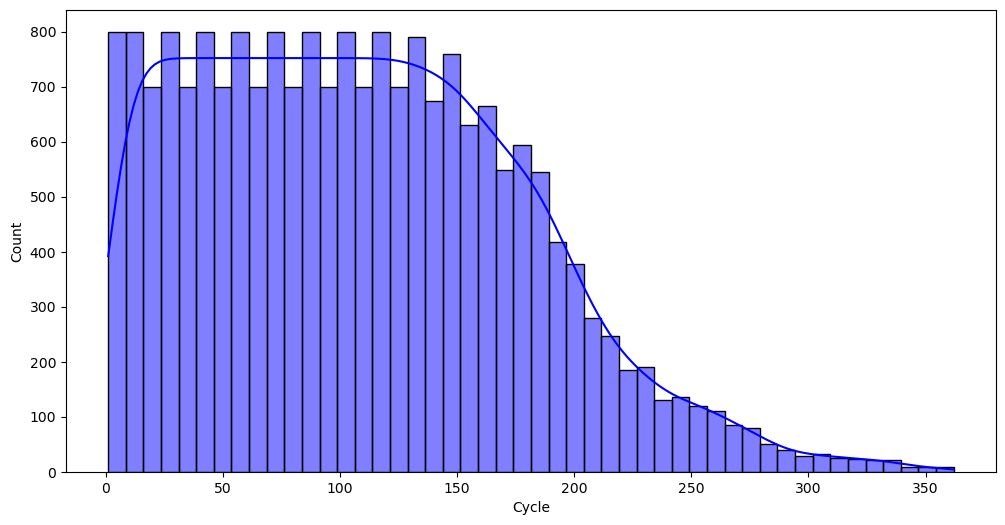

In [25]:
plt.subplots(figsize=(12, 6))
sns.histplot(training_data_1['Cycle'], kde = True, color='blue')
print("Mean number of cycles for dataset 1: " + str(math.floor(training_data_1['Cycle'].mean())))

Mean number of cycles for dataset 2: 109


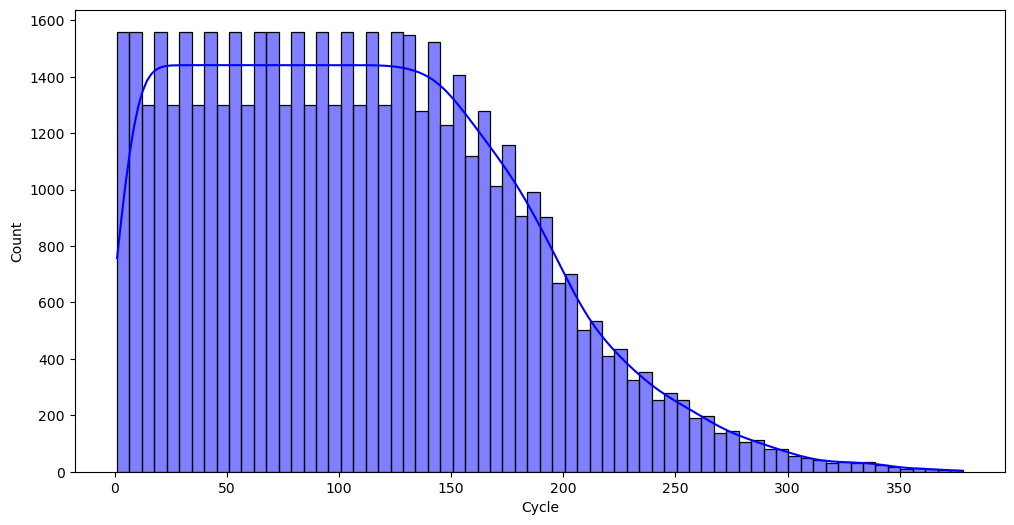

In [26]:
plt.subplots(figsize=(12, 6))
sns.histplot(training_data_2['Cycle'], kde = True, color='blue')
print("Mean number of cycles for dataset 2: " + str(math.floor(training_data_2['Cycle'].mean())))

Mean number of cycles for dataset 3: 139


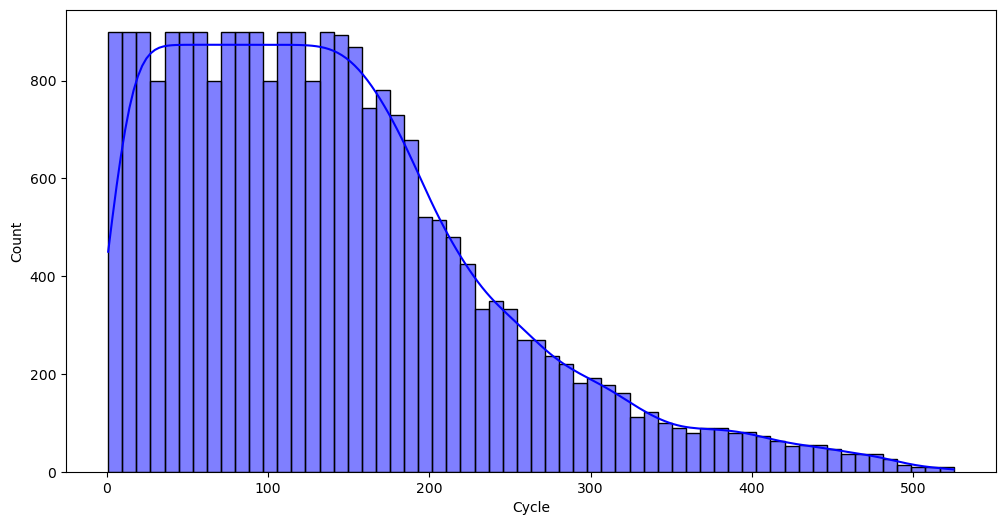

In [27]:
plt.subplots(figsize=(12, 6))
sns.histplot(training_data_3['Cycle'], kde = True, color='blue')
print("Mean number of cycles for dataset 3: " + str(math.floor(training_data_3['Cycle'].mean())))

Mean number of cycles for dataset 4: 134


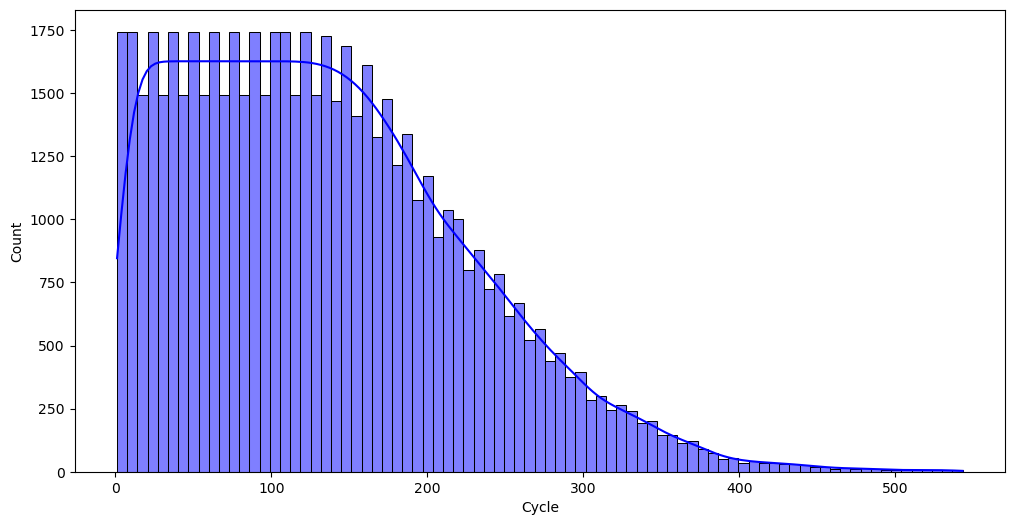

In [28]:
plt.subplots(figsize=(12, 6))
sns.histplot(training_data_4['Cycle'], kde = True, color='blue')
print("Mean number of cycles for dataset 4: " + str(math.floor(training_data_4['Cycle'].mean())))

**Understanding trends in sensor data:**
This essentially boils down to examining the distributions of each feature. 

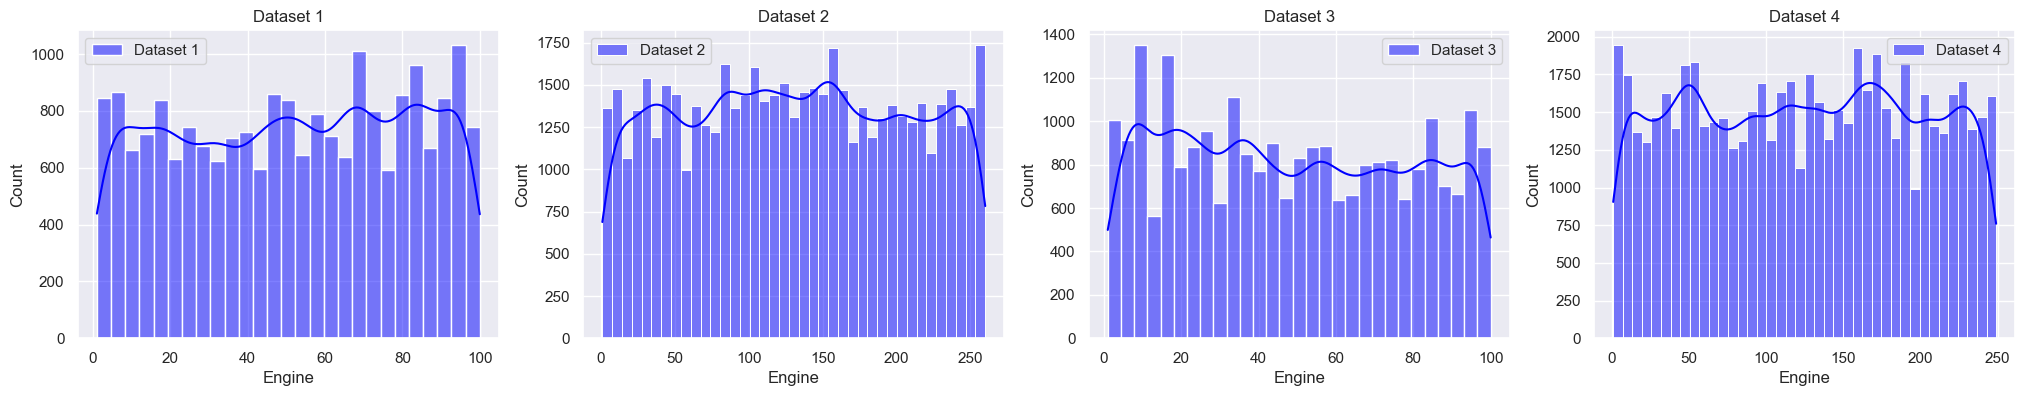

In [103]:
sns.set()

fig, axes = plt.subplots(1, 4, figsize=(25, 4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,0],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

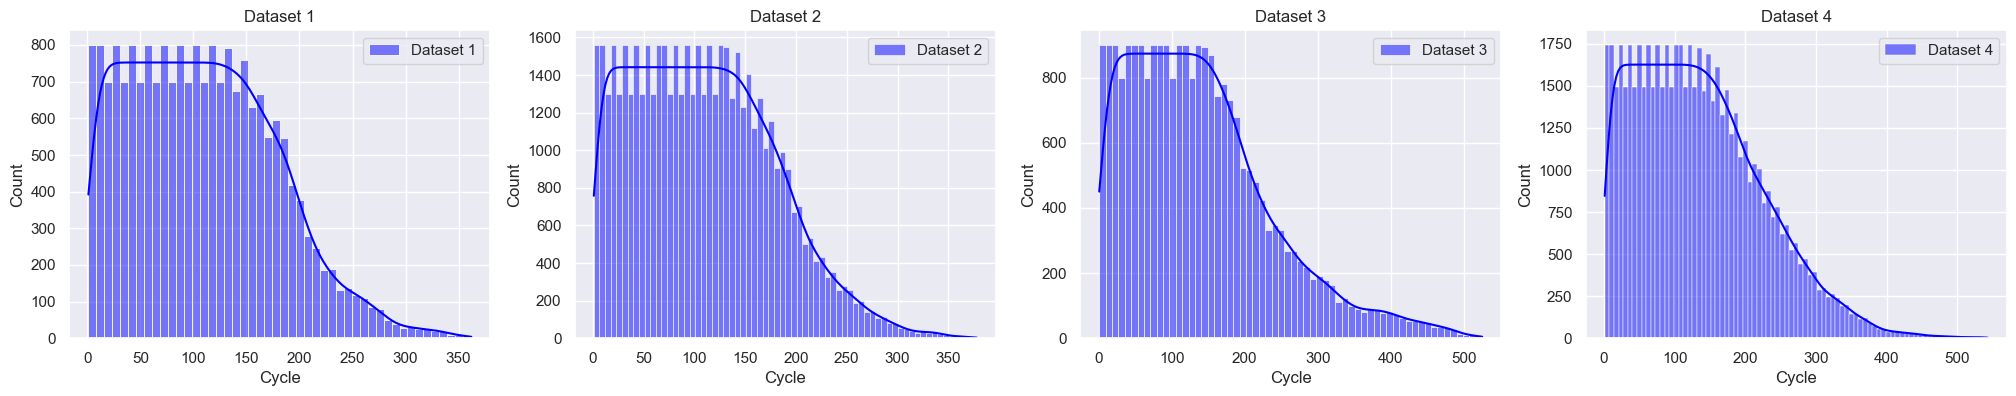

In [104]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,1],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

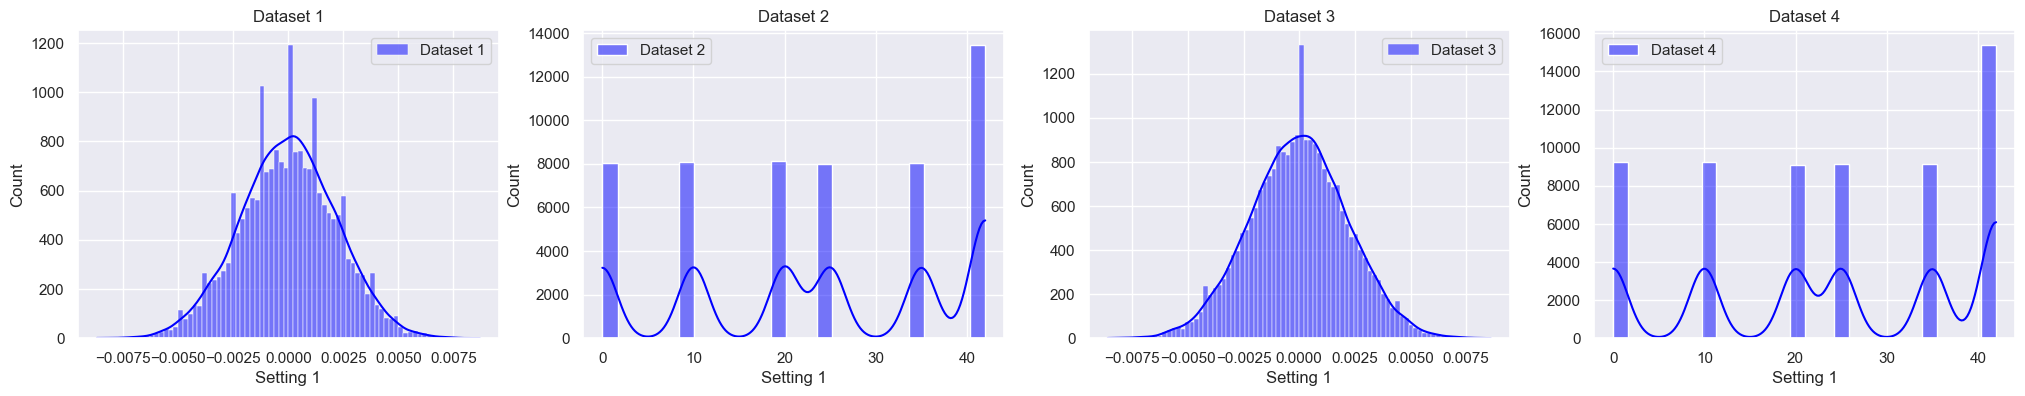

In [105]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,2],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

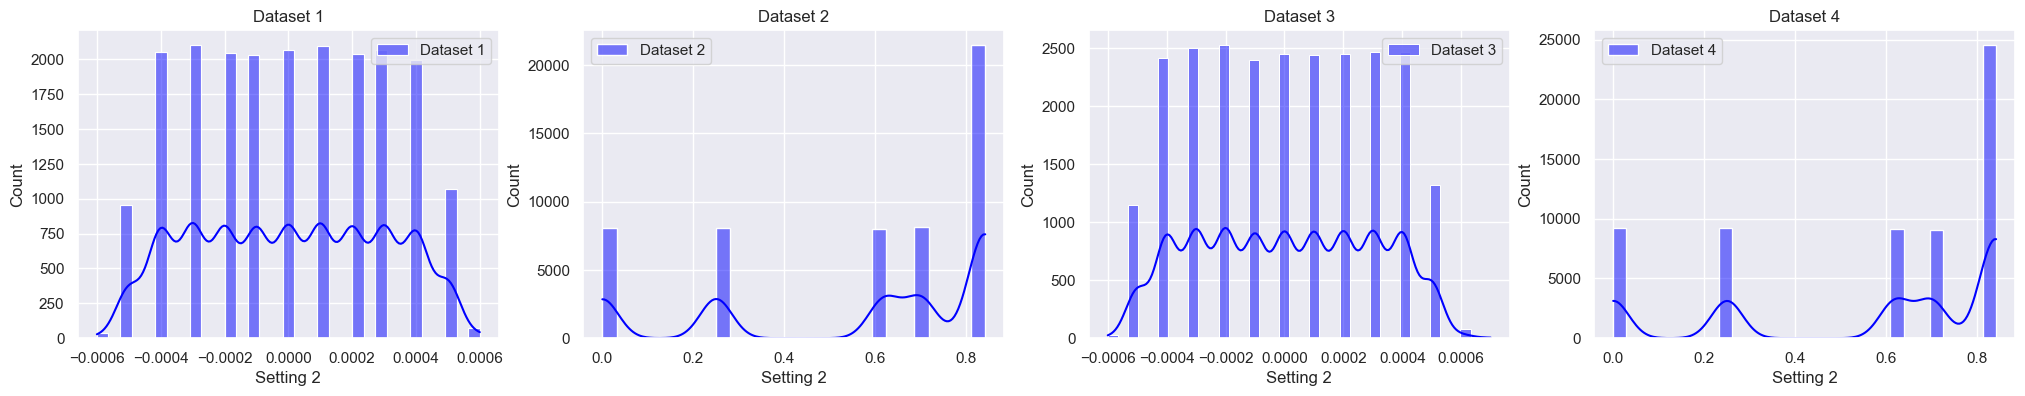

In [106]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,3],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

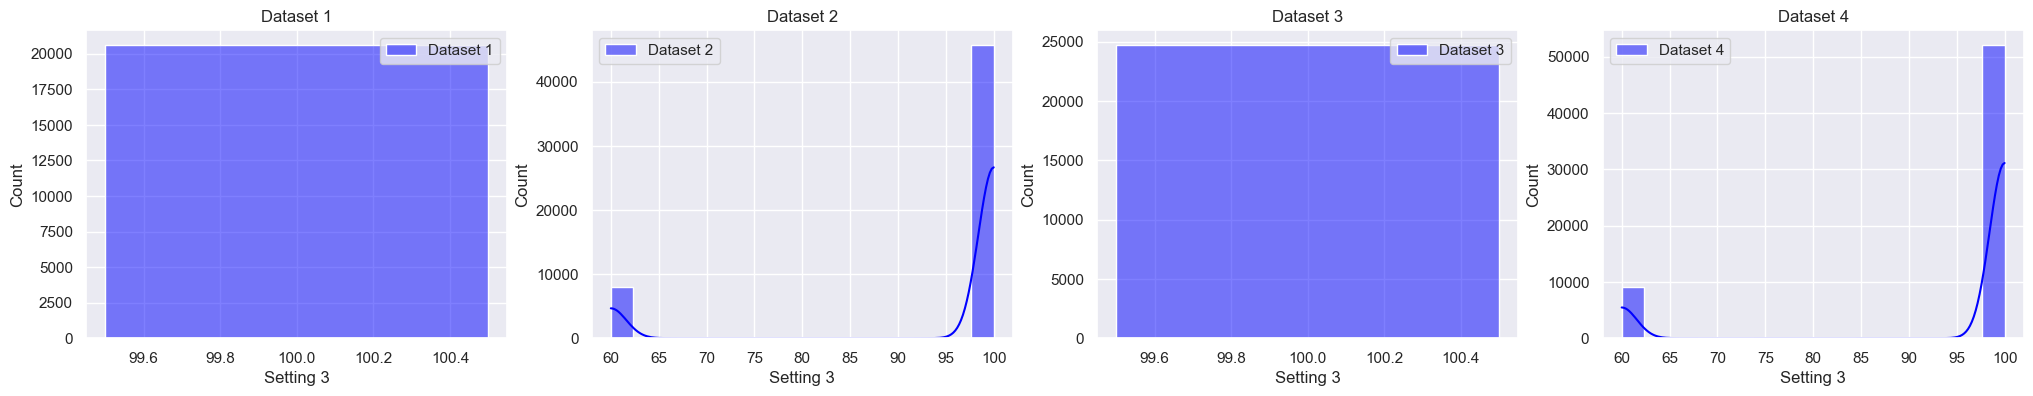

In [107]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,4],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

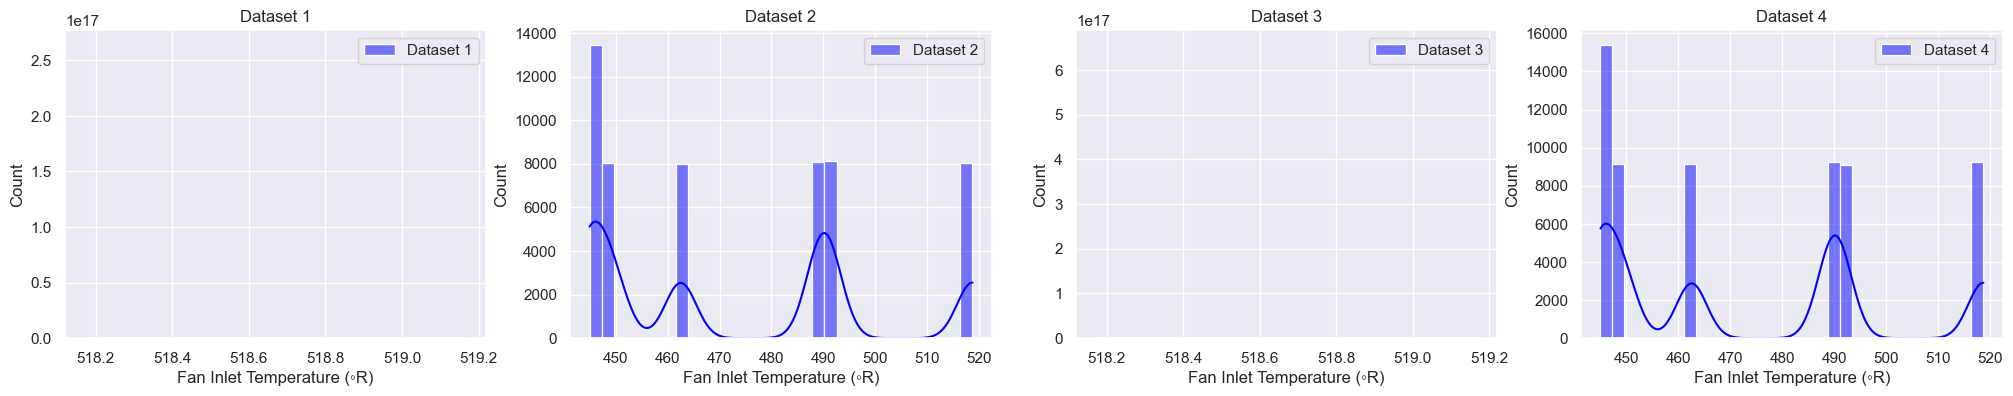

In [108]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,5],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

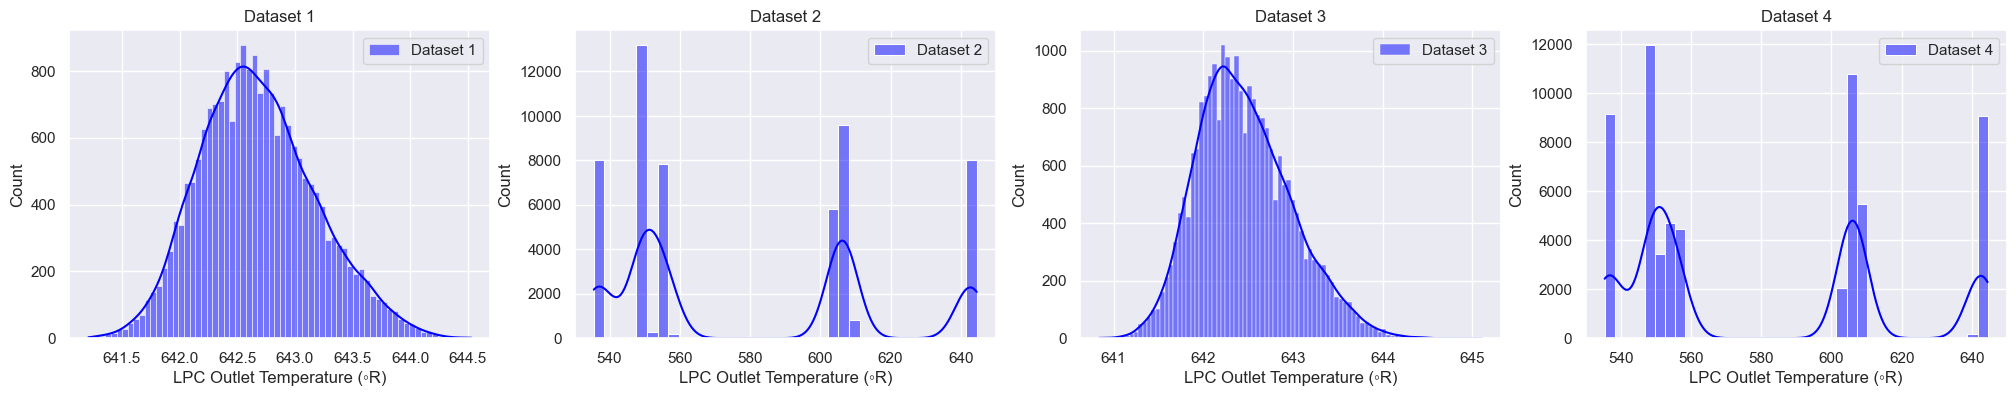

In [109]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,6],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

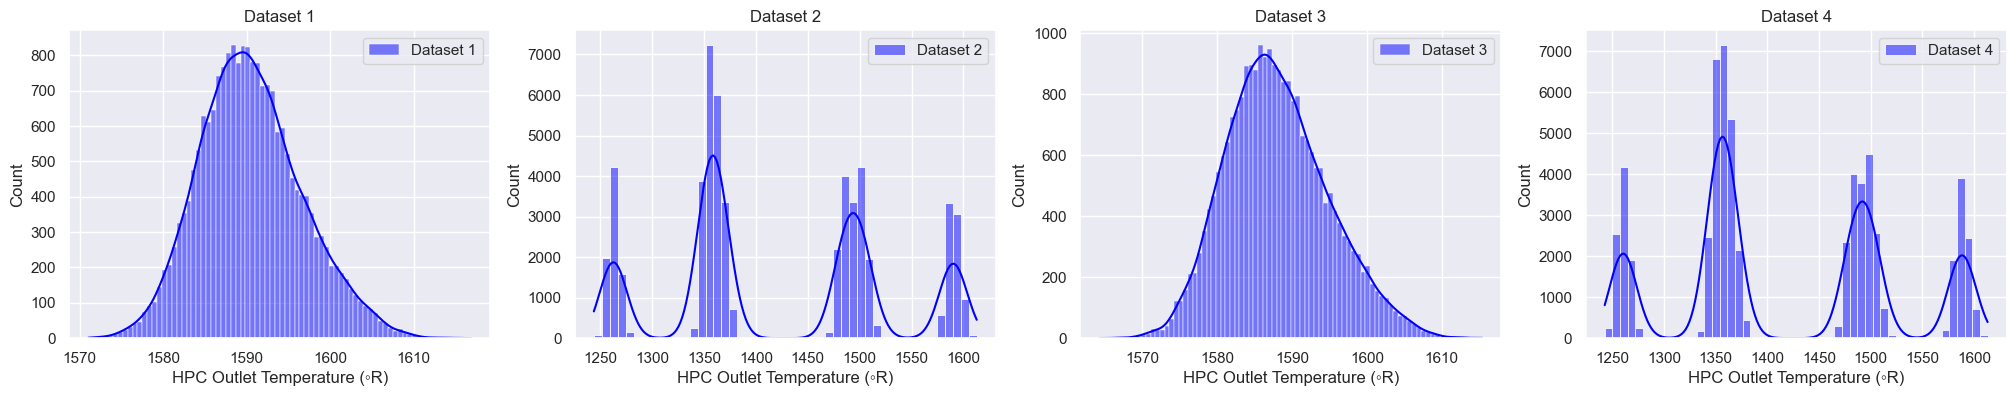

In [110]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,7],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

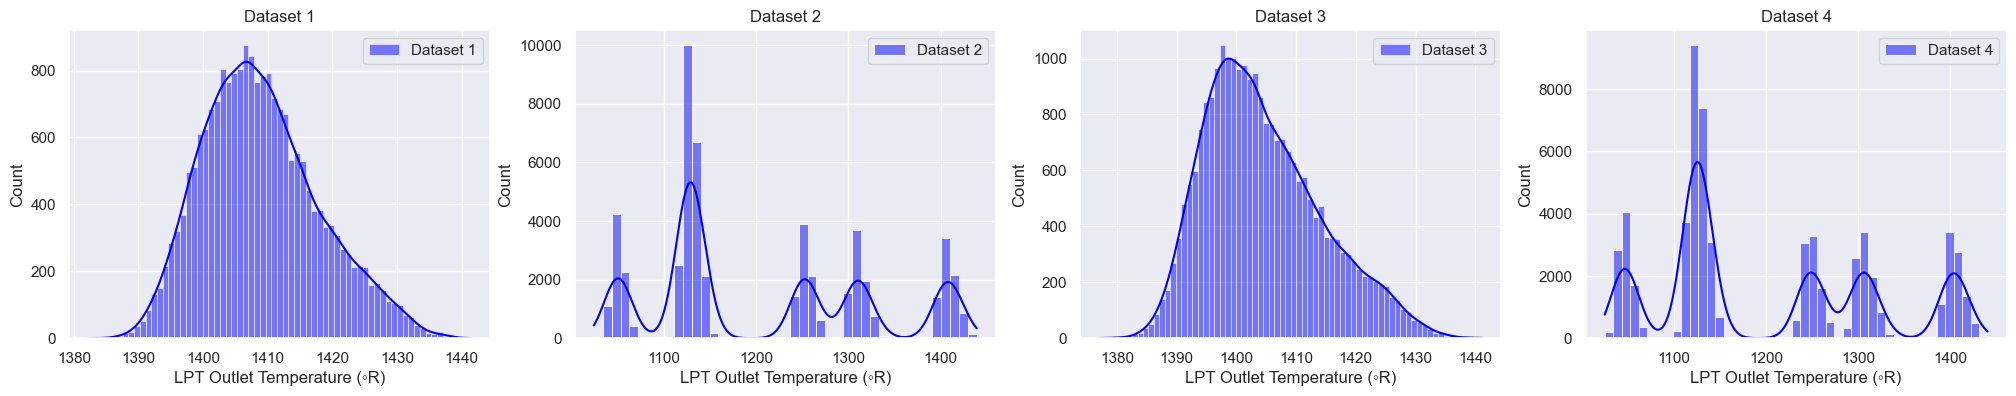

In [111]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,8],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

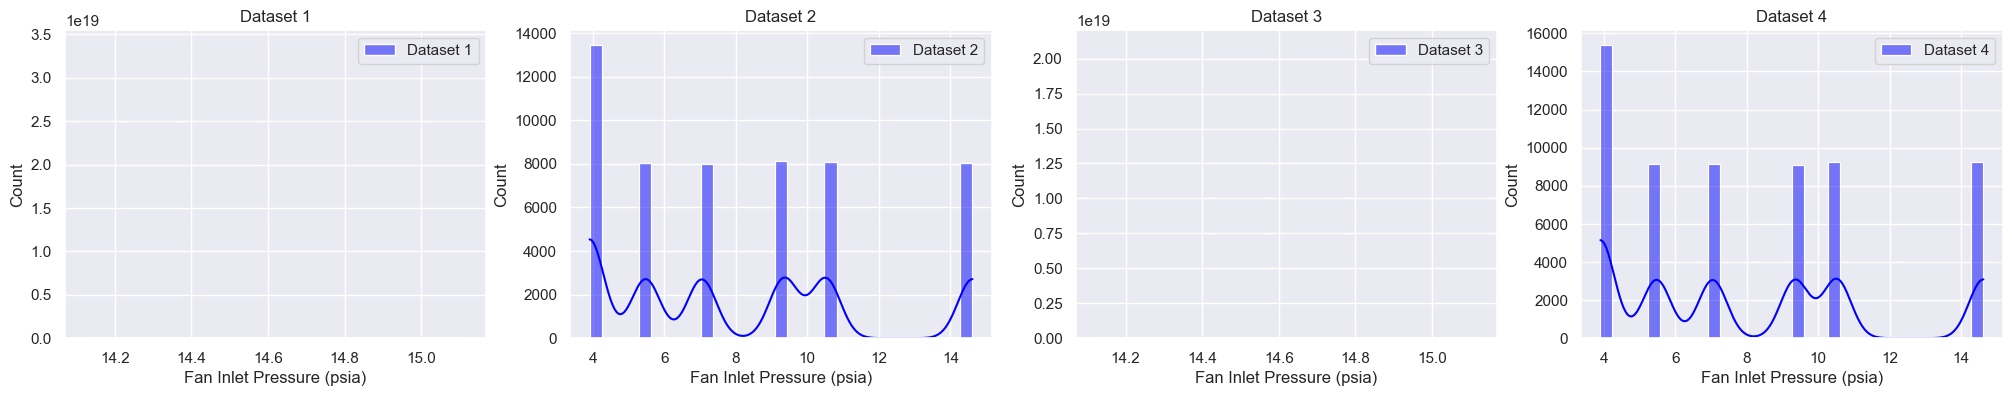

In [112]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,9],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

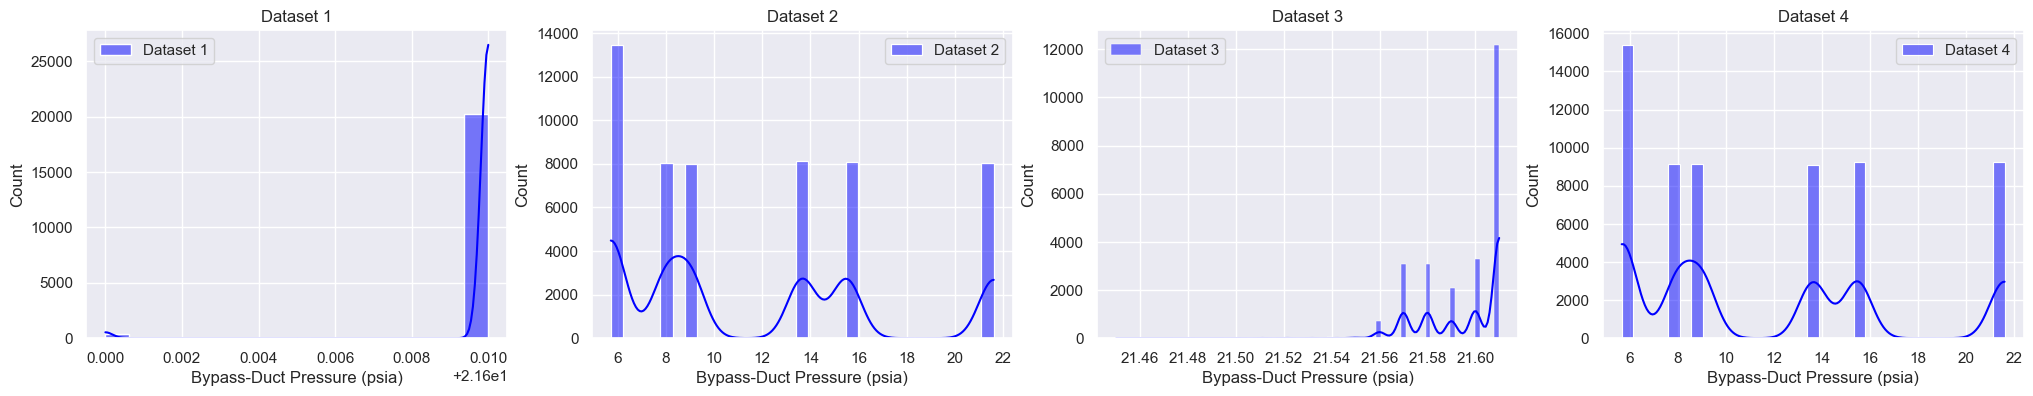

In [113]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,10],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

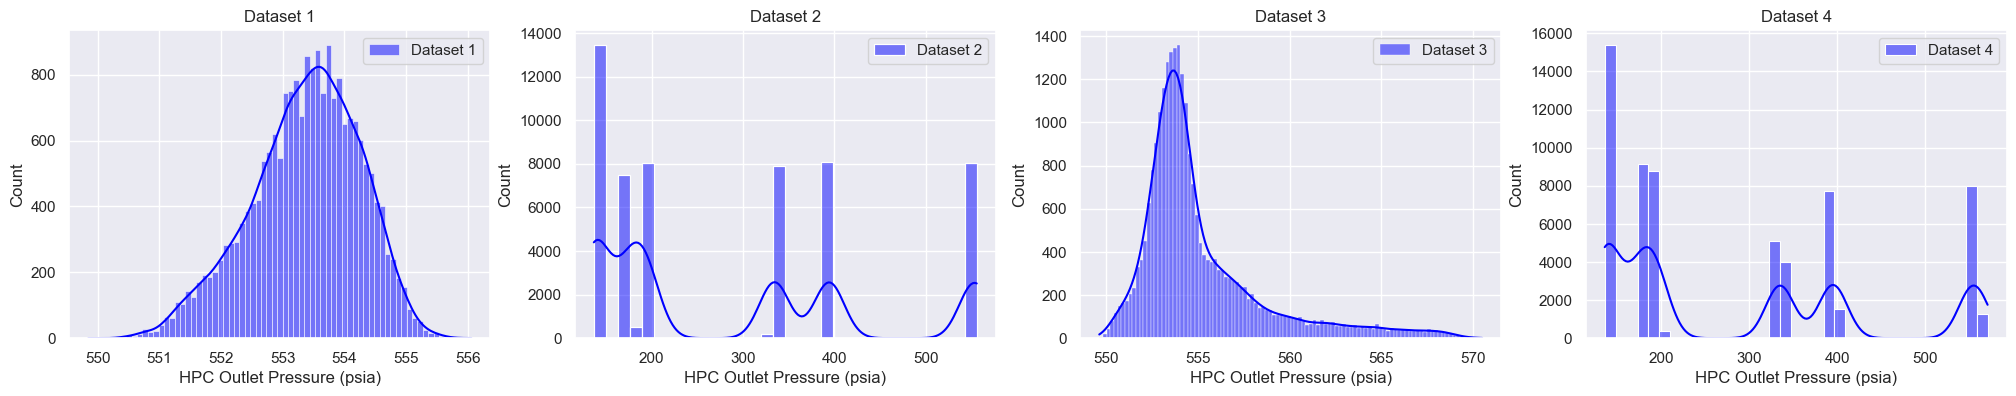

In [114]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,11],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

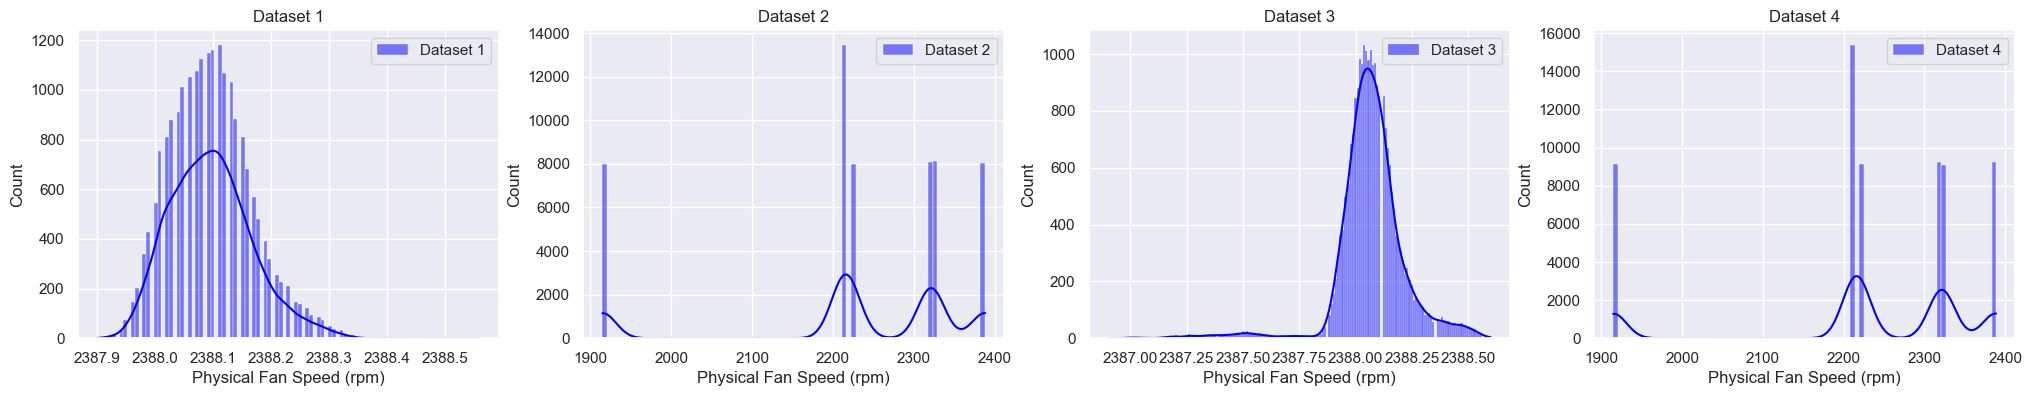

In [115]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,12],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

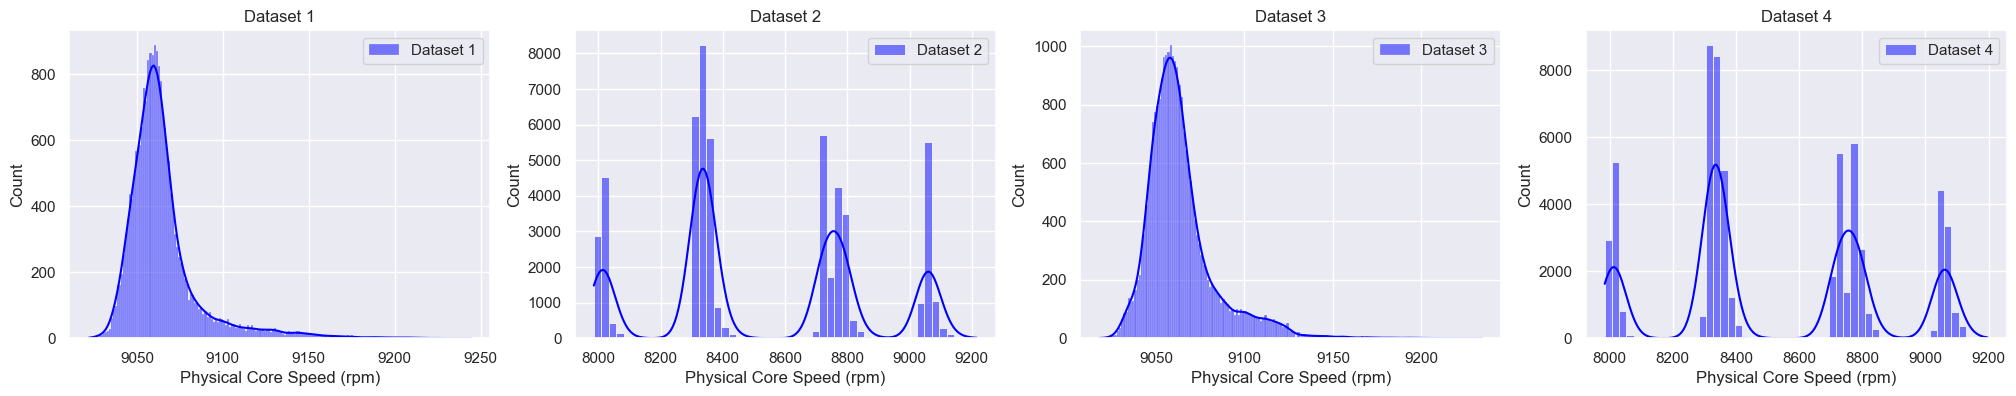

In [116]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,13],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

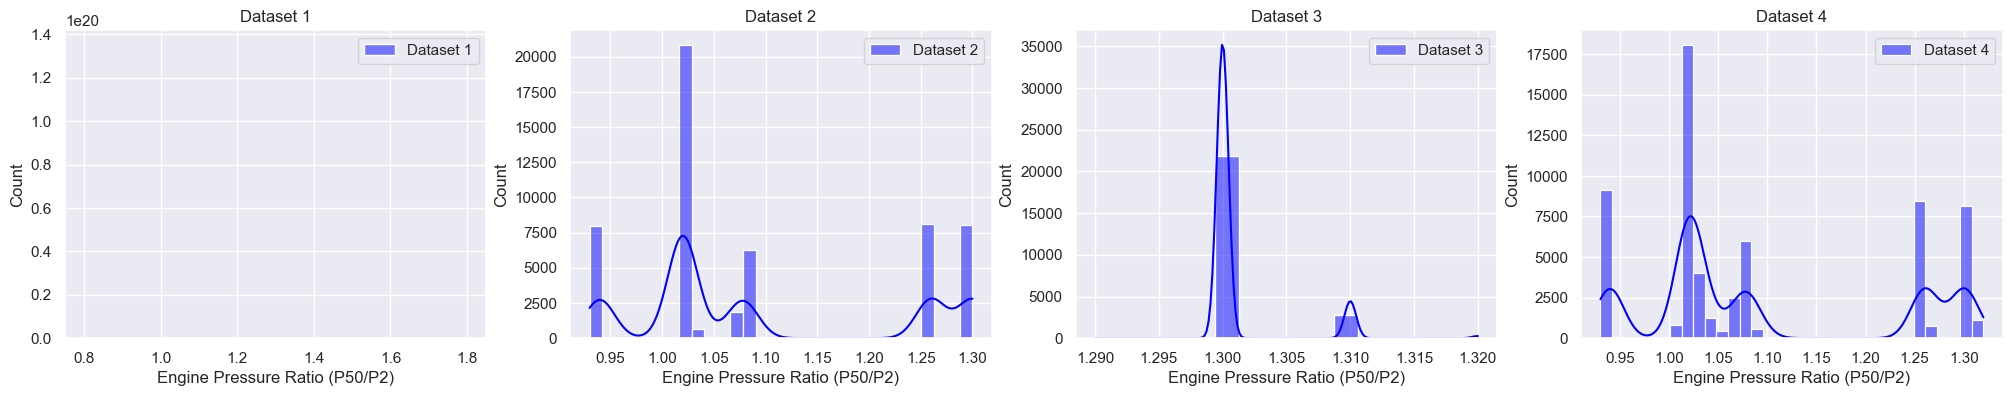

In [117]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,14],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

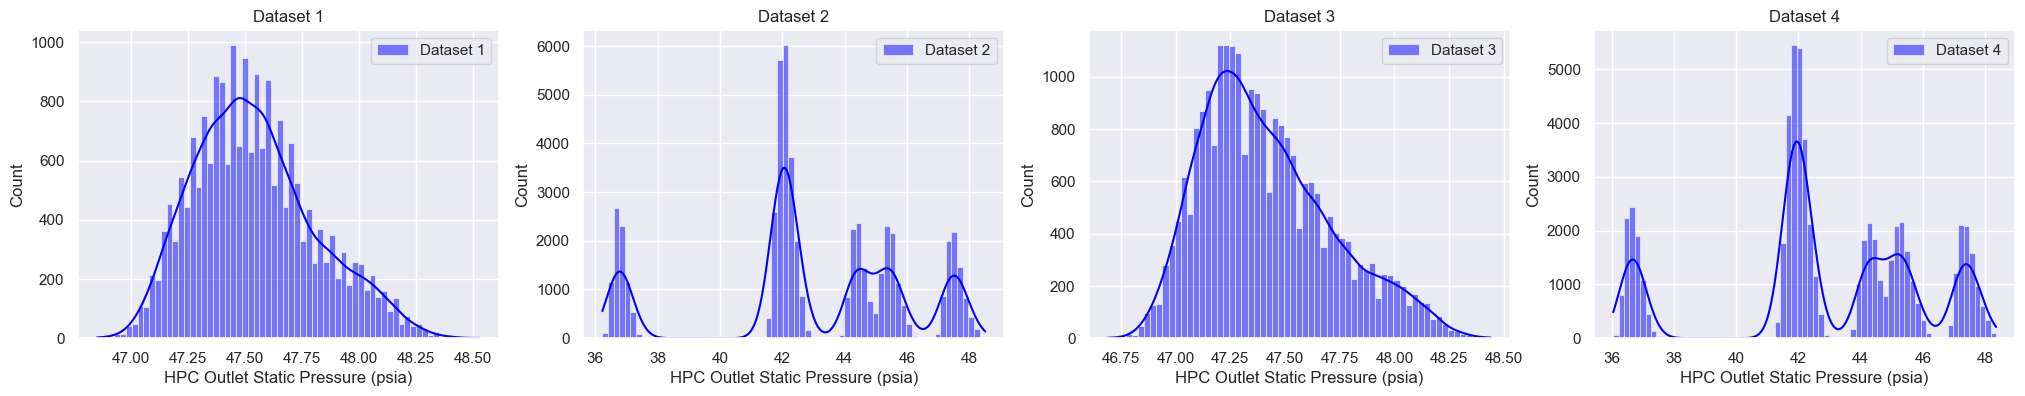

In [119]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,15],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

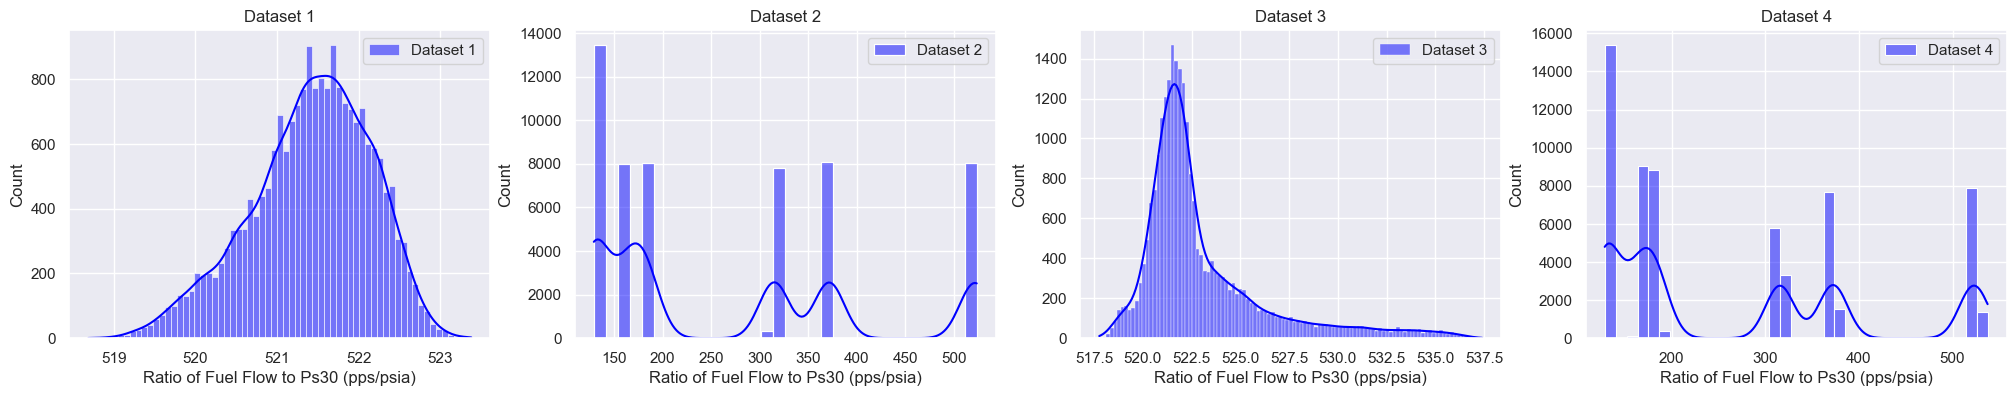

In [120]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,16],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

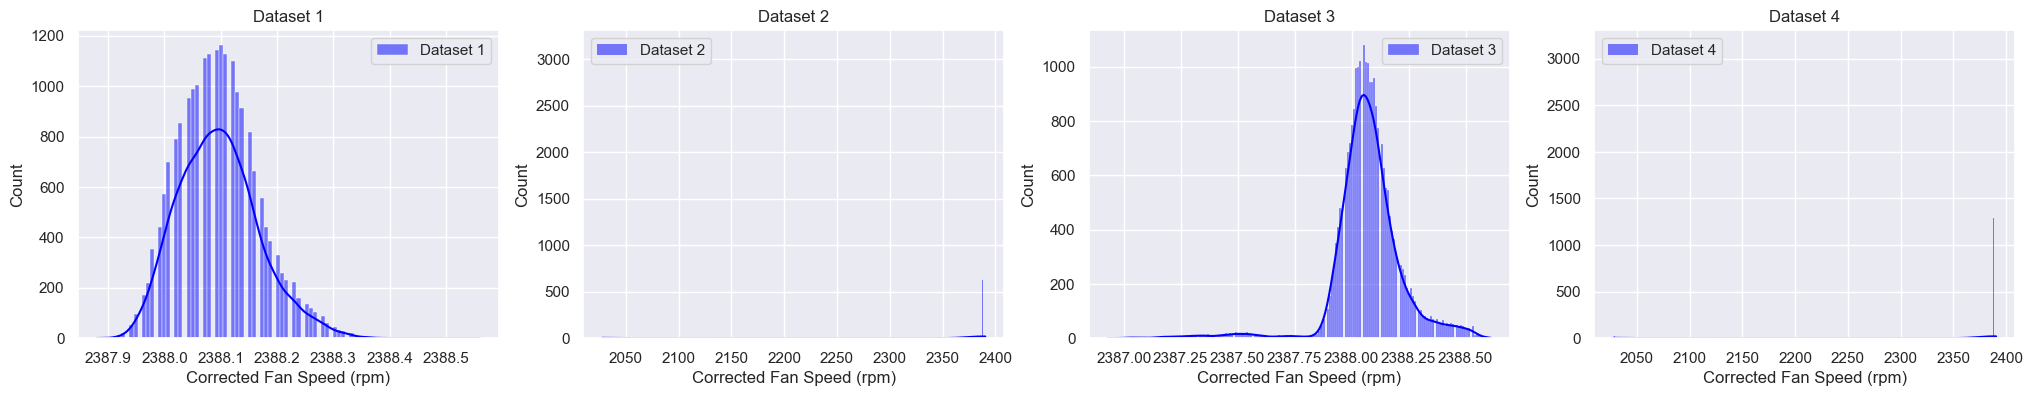

In [121]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,17],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

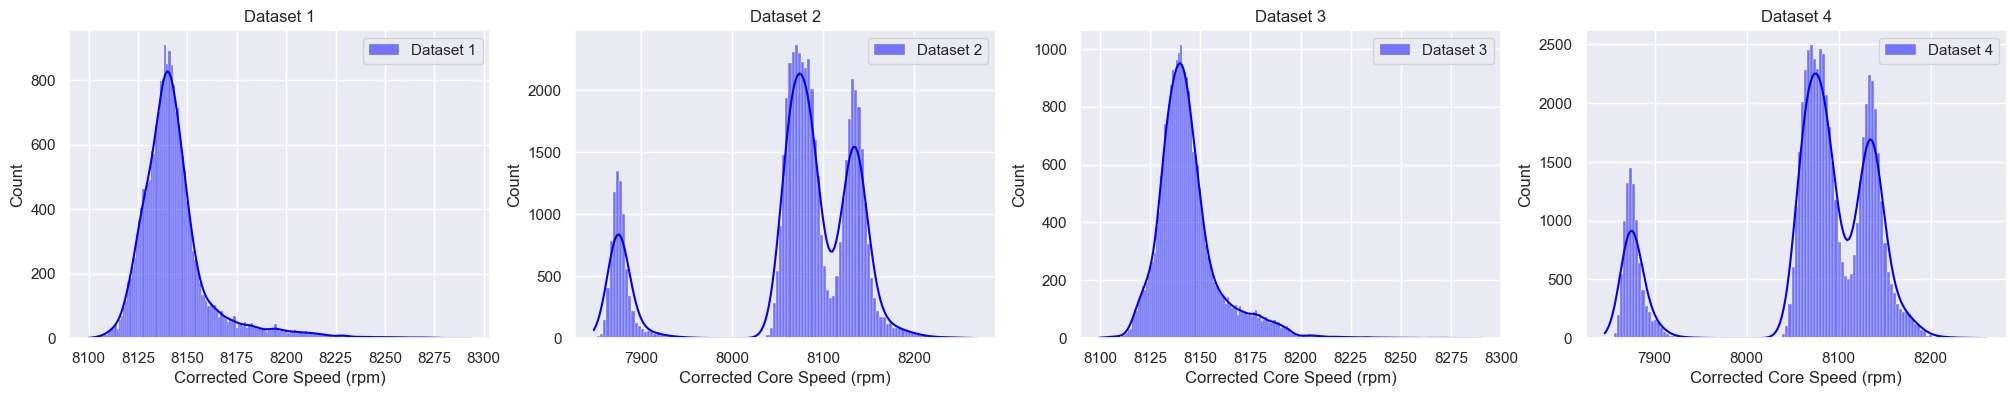

In [122]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,18],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

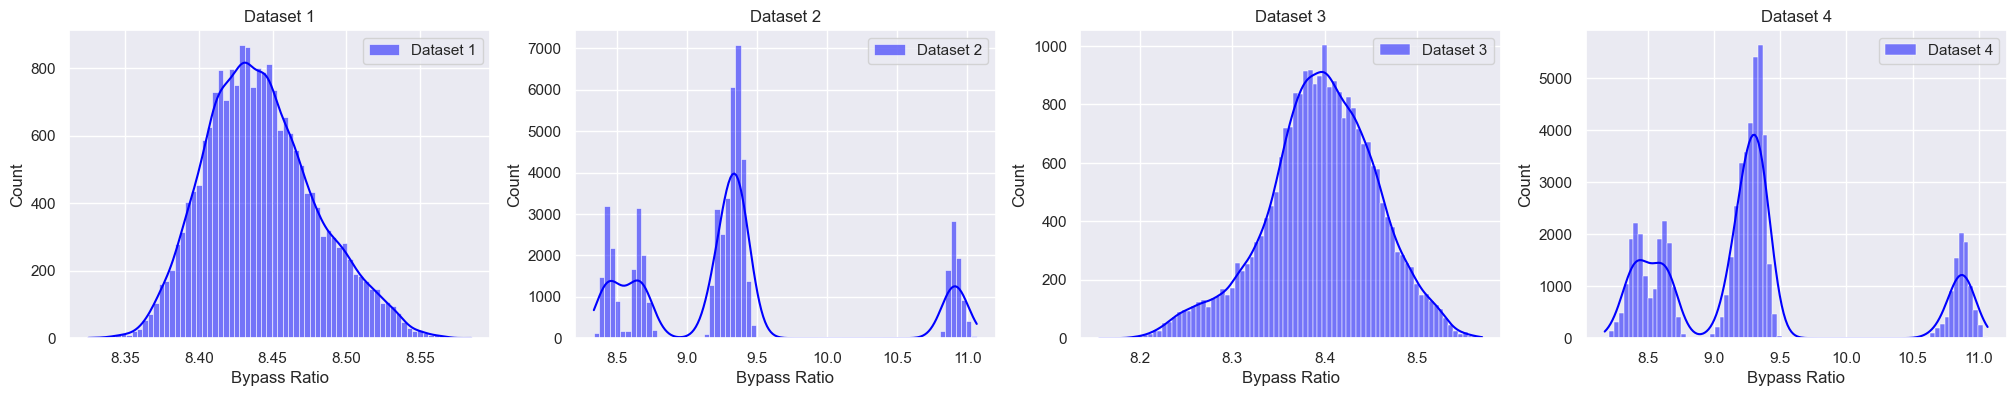

In [123]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,19],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

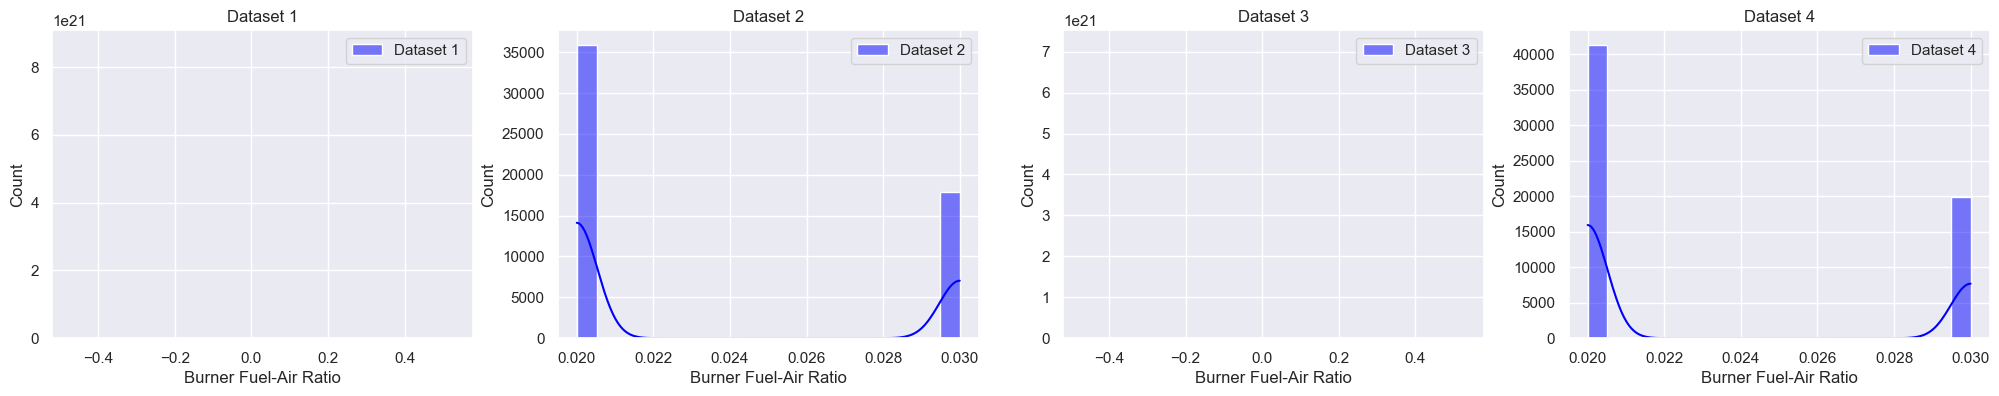

In [124]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,20],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

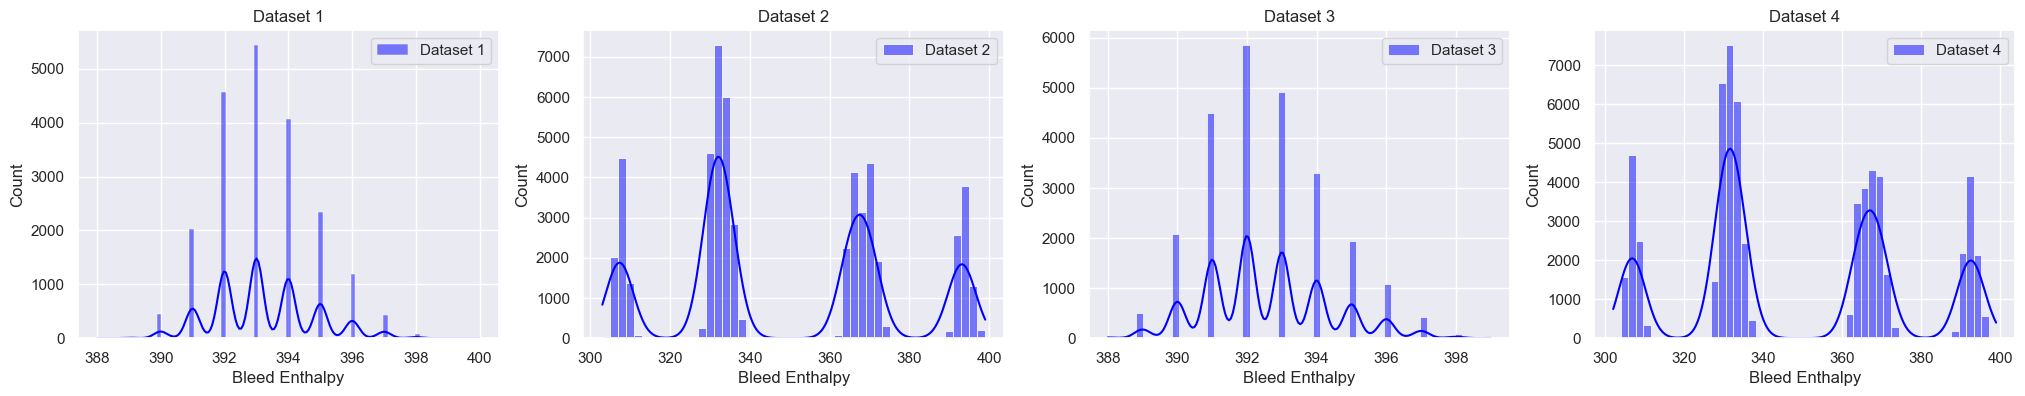

In [125]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,21],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

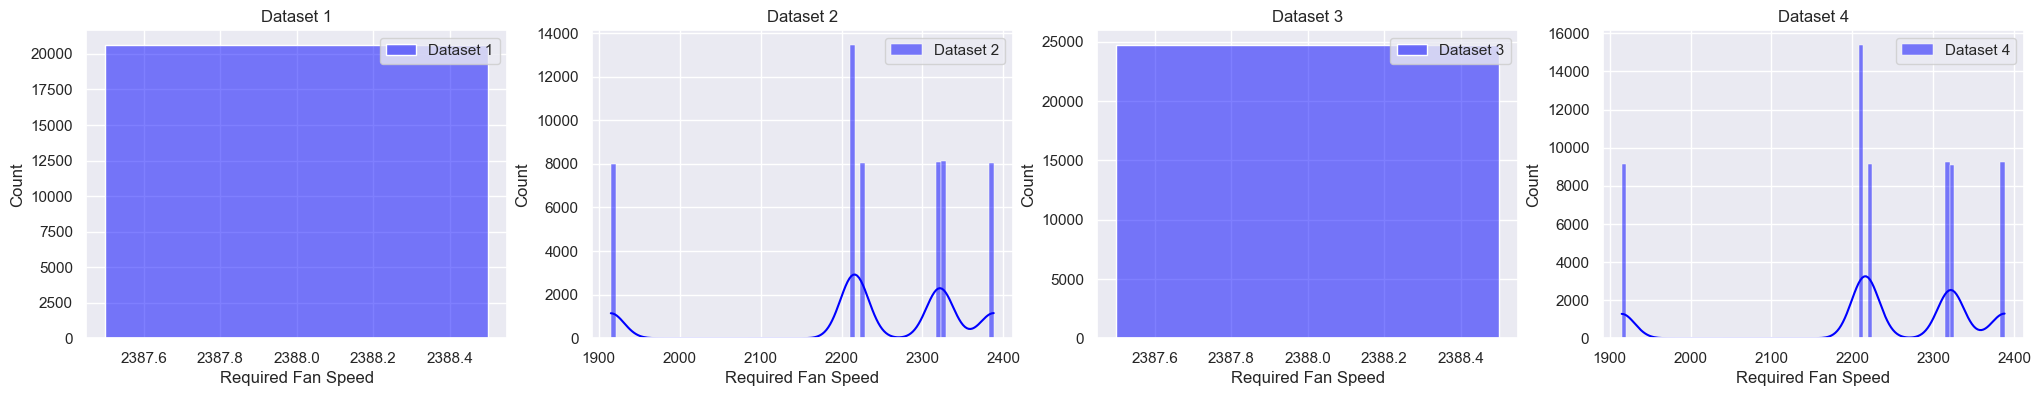

In [126]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,22],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

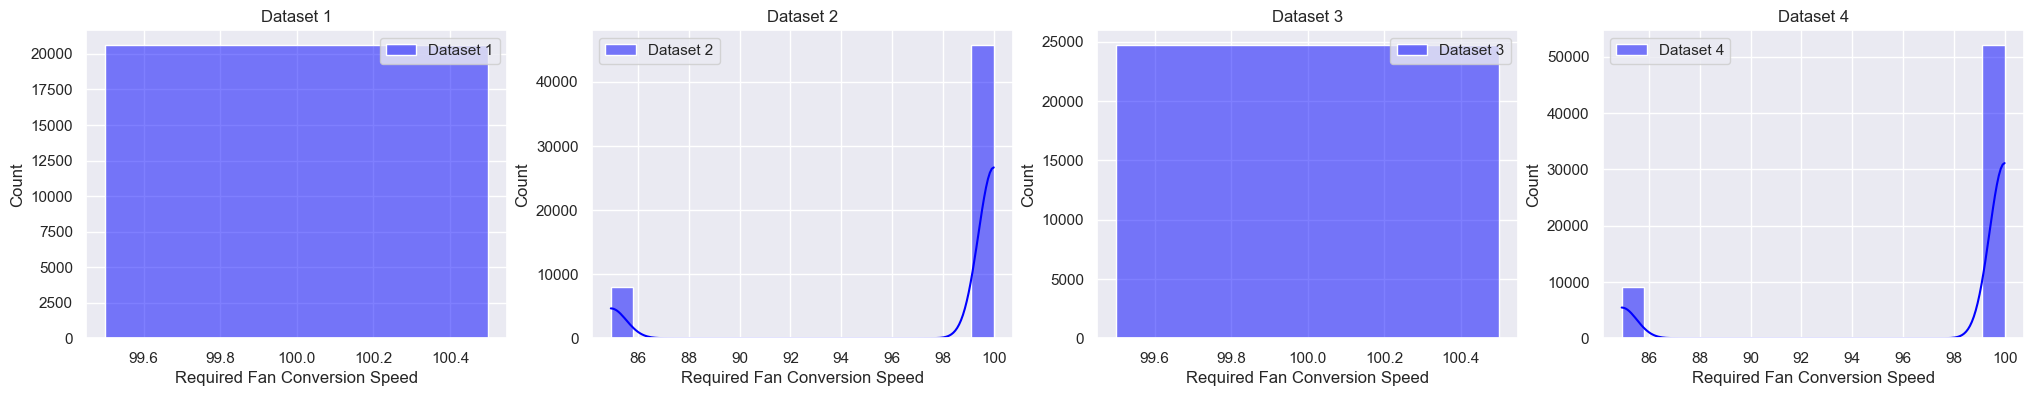

In [127]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,23],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

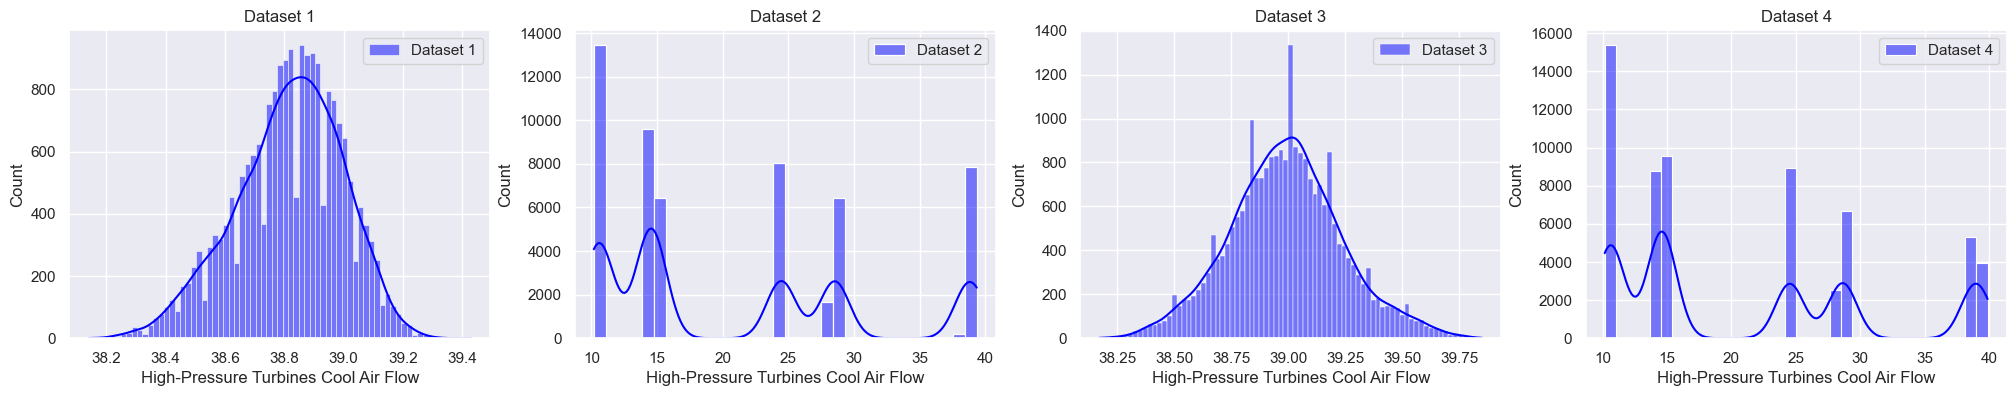

In [128]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,24],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

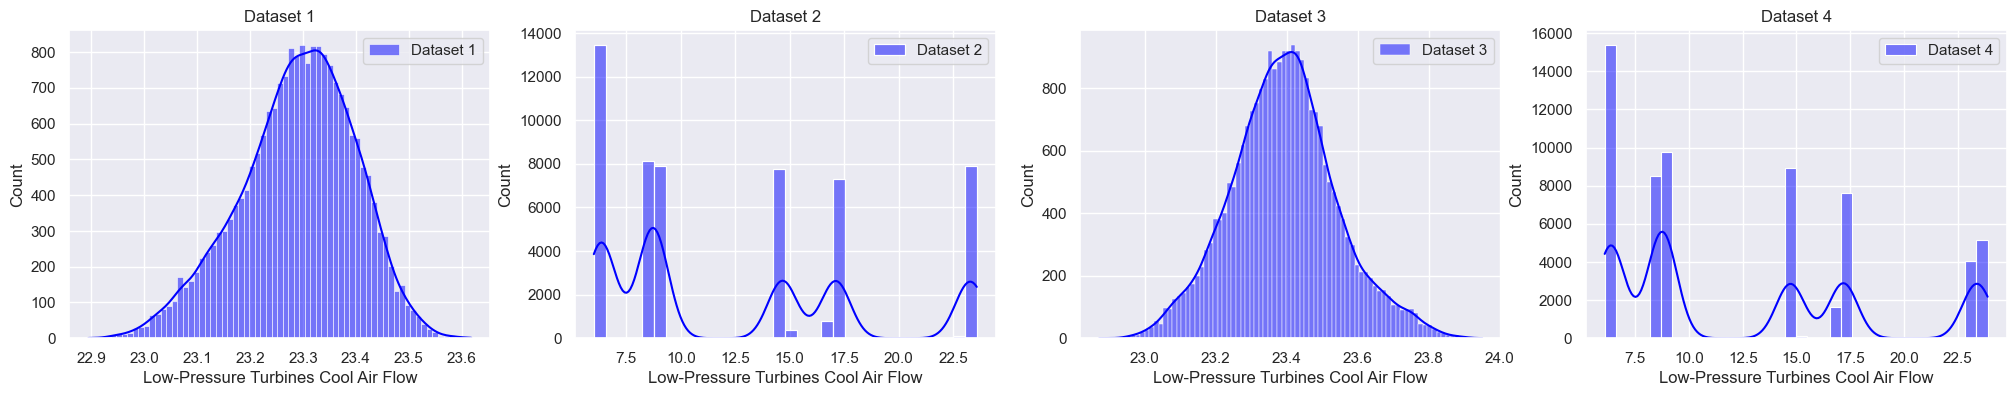

In [129]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(25,4))
for j, dataset in enumerate([training_data_1, training_data_2, training_data_3, training_data_4]):
    sns.histplot(dataset.iloc[:,25],color='blue', kde=True, ax=axes[j], label=f'Dataset {j + 1}')
    axes[j].set_title(f'Dataset {j + 1}')
    axes[j].legend()
plt.show()

**Findings so far:**

Set 1: condition 1, fault modes: HPC degredation

Set 2: condition 6, fault modes: HPC degredation

Set 3: condition 1, fault modes: HPC degredation, fan degredation

Set 4: condition 6, fault modes: HPC degredation, fan degredation 

Since sets 1 and 3 exhibit normal distributions for most features, traditional algorithms that assume normality, such as linear regression, may be suitable.
More random distributions in sets 2 and 4 suggest potential non-linear relationships or more complex patterns. Tree-based models (like decision trees, random forests, or boosting) and non-linear models (such as neural networks) could be more appropriate.